In [3]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
from scipy.sparse.linalg import cg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import os
import sys
import glob
import time
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args



/home/codespace/.python/current/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/codespace/.python/current/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimizatio

In [5]:
# 导入数据

data = pd.read_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/input/final_data_input_important_16869.csv')
# C:/Jiqiang/jh_z/jh_z/model training_pc/final_data_input_important.csv
# /Users/jiqiang/Nutstore Files/DULT/小论文/第一篇小论文/数据/jh_z/model training_pc_20230521/final_data_input_important.csv
df= pd.DataFrame(data)
counts = df['label'].value_counts()
num_zeros = counts[0]
num_ones = counts[1]
print("number of zero:",num_zeros)
print("number of one:",num_ones)

df


number of zero: 14402
number of one: 2466


,FID_,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW,label
0,0,1.032337,0.173904,0.540760,1399.816133,3.449655,2032.268709,7.511351,1
1,1,1.036179,0.173910,0.540058,1452.270984,3.351578,2289.101516,7.397089,1
2,2,1.034249,0.173900,0.540413,1427.899396,3.355286,2170.271564,7.548316,1
3,3,1.040040,0.173918,0.539438,1487.814834,3.489952,2261.629379,8.816202,1
4,4,1.038104,0.173915,0.539721,1472.312893,3.421316,2262.551560,9.006661,1
...,...,...,...,...,...,...,...,...,...
16863,17497,0.973075,0.173802,0.558195,288.711012,2.471787,995.830005,5.545090,0
16864,17498,0.972212,0.173765,0.558101,301.895848,2.573513,1024.210310,7.424834,0
16865,17499,0.974931,0.173857,0.558490,242.731595,2.150453,890.199884,6.642009,0
16866,17500,0.976530,0.173897,0.558775,224.446030,2.170294,786.371904,6.314220,0


In [6]:
# 从总数据中抽取1000个1和1000个0作为训练和测试，剩下的作为预测集
# 随机抽取label为0和1的数据各1000个
df1 = pd.concat([df[df['label']==0].sample(n=1000),df[df['label']==1].sample(n=1000)]) # 训练集和测试集
print(df1)

# 删除已经抽取的数据，剩下的放入df2中
df2 = df.drop(df1.index) # 剩下的数据作为预测集
df2


        FID_  average_max_rainfall  average_2hr_rainfall   
13491  13904              1.086656              0.168846  \
284      289              1.046975              0.173896   
7138    7354              1.054009              0.178320   
11001  11300              1.018602              0.168529   
1186    1212              0.992949              0.174025   
...      ...                   ...                   ...   
12988  13381              1.042608              0.164513   
13518  13932              1.088905              0.168922   
10378  10657              0.923543              0.154666   
7863    8090              1.028185              0.166728   
12311  12663              1.028087              0.167187   

       average_72hr_rainfall  distance to coast        EV          TWI   
13491               0.589166         503.328506  2.785910  1897.091486  \
284                 0.538486        1115.150307  3.668144  2046.304339   
7138                0.572927          68.329249  2.520665

,FID_,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW,label
0,0,1.032337,0.173904,0.540760,1399.816133,3.449655,2032.268709,7.511351,1
2,2,1.034249,0.173900,0.540413,1427.899396,3.355286,2170.271564,7.548316,1
3,3,1.040040,0.173918,0.539438,1487.814834,3.489952,2261.629379,8.816202,1
4,4,1.038104,0.173915,0.539721,1472.312893,3.421316,2262.551560,9.006661,1
5,5,1.031257,0.173902,0.540960,1400.698530,3.587869,1970.089000,5.458872,1
...,...,...,...,...,...,...,...,...,...
16862,17496,0.935459,0.191556,0.553047,342.628301,3.359726,1080.673409,5.261832,0
16863,17497,0.973075,0.173802,0.558195,288.711012,2.471787,995.830005,5.545090,0
16864,17498,0.972212,0.173765,0.558101,301.895848,2.573513,1024.210310,7.424834,0
16865,17499,0.974931,0.173857,0.558490,242.731595,2.150453,890.199884,6.642009,0


In [7]:
# 固定训练集、测试集、预测集，将其分别输出到CSV文件中
df1.to_csv('train_test_data.csv', index=False)
df2.to_csv('predict_data.csv', index=False)

In [8]:
# 用df1中的数据划分训练集和测试集，输出到CSV文件中，随后分别为训练集和测试集输入特征进行标准化
from sklearn.model_selection import train_test_split

# 提取最后一列并命名为“y”
Y = df1.iloc[:, -1]
Y.name = 'y'


X_train_orgin, X_test_orgin, Y_train_orgin, Y_test_orgin = train_test_split(df1.drop('label', axis=1), df1['label'], test_size=0.2, random_state=42)

# 输出训练集和测试集
X_train_Y_train = pd.concat([X_train_orgin, Y_train_orgin],axis=1)
X_test_Y_test = pd.concat([X_test_orgin, Y_test_orgin],axis=1)

X_train_Y_train.to_csv('train_data.csv', index=False)
X_test_Y_test.to_csv('test_data.csv', index=False)

# 训练集和测试集的特征标准化
from sklearn.preprocessing import StandardScaler


# 提取除最后一列和第一列单元名以外的所有列并命名为“X”
X_train_orgin_dropFID = X_train_orgin.iloc[:, 1:]
X_test_orgin_dropFID = X_test_orgin.iloc[:, 1:]
X_pred = df2.iloc[:, 1:-1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_orgin_dropFID)
X_test_scaled = scaler.transform(X_test_orgin_dropFID)
X_pred_scaled = scaler.transform(X_pred)

# 将标准化后的数据输出到新的数据框中
X_train = pd.DataFrame(X_train_scaled, columns=X_train_orgin_dropFID.columns, index=X_train_orgin_dropFID.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test_orgin_dropFID.columns,  index=X_test_orgin_dropFID.index)
X_pred = pd.DataFrame(X_pred_scaled, columns=X_pred.columns, index=X_pred.index)

Y_train = Y_train_orgin
Y_test = Y_test_orgin

In [9]:
X_pred

,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
0,0.474679,0.929422,-0.994147,2.030718,0.854892,1.160552,1.137013
2,0.511135,0.928919,-1.013142,2.100033,0.757858,1.330238,1.164684
3,0.621560,0.931501,-1.066588,2.247917,0.896326,1.442570,2.113809
4,0.584658,0.931108,-1.051102,2.209655,0.825753,1.443704,2.256385
5,0.454081,0.929120,-0.983161,2.032896,0.997007,1.084097,-0.399450
...,...,...,...,...,...,...,...
16862,-1.372627,3.540585,-0.320730,-0.578632,0.762424,-0.009515,-0.546952
16863,-0.655339,0.914435,-0.038612,-0.711711,-0.150579,-0.113837,-0.334909
16864,-0.671812,0.908980,-0.043743,-0.679168,-0.045981,-0.078941,1.072247
16865,-0.619966,0.922521,-0.022415,-0.825197,-0.480983,-0.243718,0.486232


In [10]:
X_pred_scaled

array([[ 0.47467944,  0.92942221, -0.99414747, ...,  0.8548917 ,
         1.16055202,  1.13701268],
       [ 0.51113518,  0.92891883, -1.01314182, ...,  0.75785843,
         1.3302382 ,  1.16468373],
       [ 0.62156025,  0.93150142, -1.06658789, ...,  0.8963257 ,
         1.44257037,  2.11380937],
       ...,
       [-0.67181219,  0.90898045, -0.043743  , ..., -0.04598113,
        -0.07894105,  1.07224668],
       [-0.61996622,  0.92252072, -0.02241541, ..., -0.48098299,
        -0.24371821,  0.48623223],
       [-0.58946573,  0.92845347, -0.0068061 , ..., -0.46058224,
        -0.37138349,  0.24085315]])

In [11]:
X_pred

,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
0,0.474679,0.929422,-0.994147,2.030718,0.854892,1.160552,1.137013
2,0.511135,0.928919,-1.013142,2.100033,0.757858,1.330238,1.164684
3,0.621560,0.931501,-1.066588,2.247917,0.896326,1.442570,2.113809
4,0.584658,0.931108,-1.051102,2.209655,0.825753,1.443704,2.256385
5,0.454081,0.929120,-0.983161,2.032896,0.997007,1.084097,-0.399450
...,...,...,...,...,...,...,...
16862,-1.372627,3.540585,-0.320730,-0.578632,0.762424,-0.009515,-0.546952
16863,-0.655339,0.914435,-0.038612,-0.711711,-0.150579,-0.113837,-0.334909
16864,-0.671812,0.908980,-0.043743,-0.679168,-0.045981,-0.078941,1.072247
16865,-0.619966,0.922521,-0.022415,-0.825197,-0.480983,-0.243718,0.486232


In [12]:
X_train_orgin

,FID_,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
16222,16779,1.049907,0.168794,0.557996,1129.889503,3.662467,2255.010078,5.742475
8521,8760,1.030456,0.166262,0.554642,884.389714,3.271473,1518.635023,5.522590
15352,15866,1.010183,0.170970,0.588249,883.283815,3.428352,1311.209166,6.065288
4342,4469,1.039167,0.162994,0.540616,423.032404,3.093332,415.010002,4.705822
15324,15837,1.023857,0.170286,0.594285,164.874177,1.070095,622.495900,7.137646
...,...,...,...,...,...,...,...,...
10131,10403,1.030044,0.170952,0.563003,333.033251,2.290530,574.086358,7.931736
15593,16132,1.032253,0.170500,0.596371,154.315681,1.327678,568.651734,4.734017
760,773,1.059307,0.174226,0.536926,1390.640338,4.359947,2394.214195,4.811757
9744,10003,1.033008,0.165231,0.554992,449.098707,2.469748,568.980120,5.601915


In [13]:
X_train_orgin_dropFID

,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
16222,1.049907,0.168794,0.557996,1129.889503,3.662467,2255.010078,5.742475
8521,1.030456,0.166262,0.554642,884.389714,3.271473,1518.635023,5.522590
15352,1.010183,0.170970,0.588249,883.283815,3.428352,1311.209166,6.065288
4342,1.039167,0.162994,0.540616,423.032404,3.093332,415.010002,4.705822
15324,1.023857,0.170286,0.594285,164.874177,1.070095,622.495900,7.137646
...,...,...,...,...,...,...,...
10131,1.030044,0.170952,0.563003,333.033251,2.290530,574.086358,7.931736
15593,1.032253,0.170500,0.596371,154.315681,1.327678,568.651734,4.734017
760,1.059307,0.174226,0.536926,1390.640338,4.359947,2394.214195,4.811757
9744,1.033008,0.165231,0.554992,449.098707,2.469748,568.980120,5.601915


In [14]:
X_train_scaled

array([[ 0.80972056,  0.17359709, -0.04948447, ...,  1.07371027,
         1.43443138, -0.18714897],
       [ 0.43882019, -0.20094194, -0.23329114, ...,  0.67167992,
         0.52899596, -0.35175227],
       [ 0.05224473,  0.49550944,  1.60856763, ...,  0.83298726,
         0.27394832,  0.05450533],
       ...,
       [ 0.98895979,  0.97707691, -1.20424884, ...,  1.7908787 ,
         1.60559461, -0.88387404],
       [ 0.48747762, -0.35348374, -0.21412679, ..., -0.15267513,
        -0.63868508, -0.29237072],
       [-1.70052368, -2.04950156, -1.4451507 , ..., -1.05777576,
        -0.73739574, -0.57247117]])

In [15]:
X_train

,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
16222,0.809721,0.173597,-0.049484,1.364486,1.073710,1.434431,-0.187149
8521,0.438820,-0.200942,-0.233291,0.758543,0.671680,0.528996,-0.351752
15352,0.052245,0.495509,1.608568,0.755813,0.832987,0.273948,0.054505
4342,0.604914,-0.684353,-1.002045,-0.380179,0.488511,-0.828004,-0.963176
15324,0.312975,0.394279,1.939391,-1.017365,-1.591836,-0.572883,0.857261
...,...,...,...,...,...,...,...
10131,0.430966,0.492780,0.224916,-0.602315,-0.336952,-0.632407,1.451708
15593,0.473075,0.425938,2.053702,-1.043426,-1.326983,-0.639089,-0.942070
760,0.988960,0.977077,-1.204249,2.008071,1.790879,1.605595,-0.883874
9744,0.487478,-0.353484,-0.214127,-0.315842,-0.152675,-0.638685,-0.292371


In [16]:
X_test

,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
6746,-1.620168,-2.472915,-1.661960,-0.406165,-1.225536,-1.234429,2.317988
14103,1.382973,0.681995,2.786837,-1.237607,-1.100981,-0.973952,-0.950450
10892,-0.983596,-0.681289,-0.210200,-0.818590,-0.471255,-0.252112,0.128266
14635,0.012017,0.900776,1.628543,-0.720080,0.495530,-0.139955,0.382085
4630,0.510029,1.380501,0.587459,-1.205099,-1.057855,-1.107377,0.470246
...,...,...,...,...,...,...,...
5404,-1.632917,-2.426068,-1.640183,-0.883414,-0.104404,-0.331938,-0.415402
1,0.547948,0.930392,-1.032600,2.160187,0.754046,1.476350,1.051477
3319,0.274122,0.385737,-0.802018,0.158948,0.022885,-0.924348,0.632359
14518,-0.810680,0.897675,0.898118,-0.902424,0.168628,-0.656145,-1.708215


In [17]:
Y_train

16222    0
8521     0
15352    0
4342     0
15324    0
        ..
10131    1
15593    1
760      0
9744     1
5293     1
Name: label, Length: 1600, dtype: int64

In [18]:
Y_test

6746     1
14103    0
10892    1
14635    0
4630     1
        ..
5404     0
1        1
3319     1
14518    0
10550    0
Name: label, Length: 400, dtype: int64

In [19]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

print(pd.value_counts(Y_train))

print(pd.value_counts(Y_test))

(1600, 7) (400, 7) (1600,) (400,)
label
0    801
1    799
Name: count, dtype: int64
label
1    201
0    199
Name: count, dtype: int64


In [20]:
def print_test_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))
    time.sleep(0.5) # to let the print get out before any progress bars

def print_train_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_train) == Y_train)/len(Y_train)))
    time.sleep(0.5) # to let the print get out before any progress bars
shap.initjs()

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# 将数据分为X_train, Y_train, X_test, Y_test

# 定义XGBoost模型
xgb_model = xgb.XGBClassifier()

# 定义参数空间
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100]
}

# 定义5折交叉验证策略
cv = StratifiedKFold(n_splits=5)

# 使用GridSearchCV进行自动调参和交叉验证
grid_search_xgb = GridSearchCV(xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv,
                           n_jobs=-1)

grid_search_xgb.fit(X_train, Y_train)

# 输出每一折的训练集和测试集准确率
for i in range(5):
    print("Fold ", i+1)
    train_index, test_index = list(cv.split(X_train, Y_train))[i]
    print("Training Accuracy: ", accuracy_score(Y_train.iloc[train_index], grid_search_xgb.predict(X_train.iloc[train_index])))
    print("Testing Accuracy: ", accuracy_score(Y_train.iloc[test_index], grid_search_xgb.predict(X_train.iloc[test_index])))

# 输出模型在训练集和测试集上的精准率、召回率、F1、ROC曲线和AUC曲线平均值
print("Training Accuracy: ", accuracy_score(Y_train, grid_search_xgb.predict(X_train)).round(3))
print("Testing Accuracy: ", accuracy_score(Y_test, grid_search_xgb.predict(X_test)).round(3))
print("Training Precision: ", precision_score(Y_train, grid_search_xgb.predict(X_train)).round(3))
print("Testing Precision: ", precision_score(Y_test, grid_search_xgb.predict(X_test)).round(3))
print("Training Recall: ", recall_score(Y_train, grid_search_xgb.predict(X_train)).round(3))
print("Testing Recall: ", recall_score(Y_test, grid_search_xgb.predict(X_test)).round(3))
print("Training F1 Score: ", f1_score(Y_train, grid_search_xgb.predict(X_train)).round(3))
print("Testing F1Score: ", f1_score(Y_test, grid_search_xgb.predict(X_test)).round(3))

# 计算ROC曲线和AUC曲线
fpr_train, tpr_train, _ = roc_curve(Y_train, grid_search_xgb.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, grid_search_xgb.predict_proba(X_test)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# 输出ROC曲线和AUC曲线平均值
print("Training ROC AUC: ", roc_auc_train.round(3))
print("Testing ROC AUC: ", roc_auc_test.round(3)) 

Fold  1
Training Accuracy:  0.88671875
Testing Accuracy:  0.8875
Fold  2
Training Accuracy:  0.89296875
Testing Accuracy:  0.8625
Fold  3
Training Accuracy:  0.88515625
Testing Accuracy:  0.89375
Fold  4
Training Accuracy:  0.88515625
Testing Accuracy:  0.89375
Fold  5
Training Accuracy:  0.884375
Testing Accuracy:  0.896875
Training Accuracy:  0.887
Testing Accuracy:  0.795
Training Precision:  0.906
Testing Precision:  0.802
Training Recall:  0.864
Testing Recall:  0.786
Training F1 Score:  0.884
Testing F1Score:  0.794
Training ROC AUC:  0.955
Testing ROC AUC:  0.873


该二分类模型在训练集和测试集上的准确率分别为0.849和0.7875。此外，该模型在训练集和测试集上的精确度、召回率、F1分数和ROC AUC也都有相应的值。一般来说，我们希望模型在测试集上的性能与训练集上的性能相当，这样才能说明模型具有较好的泛化能力。从这些指标来看，该模型在测试集上表现良好，但是相对于训练集而言还有一定程度的下降。此外，ROC AUC值可以用来评估模型对正负样本分类的能力，该模型在测试集上ROC AUC为0.8502，说明其分类效果还是比较不错的。总体而言，该二分类模型表现良好但仍有改进空间。

In [22]:
# nn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# 定义多层感知机模型
mlp = MLPClassifier()

# 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# 定义5折交叉验证器
cv = StratifiedKFold(n_splits=5)

# 定义网格搜索器
grid_search_mlp = GridSearchCV(mlp, param_grid=param_grid,
                           cv=cv, scoring='roc_auc')

# 训练模型并进行自动调参
grid_search_mlp.fit(X_train, Y_train)

# 输出最佳参数组合和对应的AUC值
print('Best parameters:', grid_search_mlp.best_params_)
print('Best AUC:', grid_search_mlp.best_score_)

# 计算模型在训练集和测试集上的精准率、召回率、F1、ROC曲线和AUC曲线等指标，并打印结果
Y_train_pred = grid_search_mlp.predict(X_train)
Y_test_pred = grid_search_mlp.predict(X_test)

print('Training accuracy:', accuracy_score(Y_train, Y_train_pred))
print('Testing accuracy:', accuracy_score(Y_test, Y_test_pred))

print('Training precision:', precision_score(Y_train, Y_train_pred))
print('Testing precision:', precision_score(Y_test, Y_test_pred))

print('Training recall:', recall_score(Y_train, Y_train_pred))
print('Testing recall:', recall_score(Y_test, Y_test_pred))

print('Training F1 score:', f1_score(Y_train, Y_train_pred))
print('Testing F1 score:', f1_score(Y_test, Y_test_pred))

fpr_train, tpr_train, _ = roc_curve(Y_train, grid_search_mlp.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, grid_search_mlp.predict_proba(X_test)[:, 1])

print('Training AUC:', auc(fpr_train, tpr_train))
print('Testing AUC:', auc(fpr_test, tpr_test))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Best AUC: 0.8474908669528107
Training accuracy: 0.838125
Testing accuracy: 0.8125
Training precision: 0.8409090909090909
Testing precision: 0.8088235294117647
Training recall: 0.8335419274092616
Testing recall: 0.8208955223880597
Training F1 score: 0.8372093023255814
Testing F1 score: 0.8148148148148148
Training AUC: 0.9188873732615207
Testing AUC: 0.856846421160529


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Best Parameters: {'C': 10}
Best Score: 0.759375
Training Accuracy: 0.76875
Training Precision: 0.7833553500660502
Training Recall: 0.7421777221526908
Training F1 Score: 0.762210796915167
Testing Accuracy: 0.79
Testing Precision: 0.8095238095238095
Testing Recall: <function recall_score at 0x7f68428ab880> [1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0
 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1
 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 0 1 1 0 0 

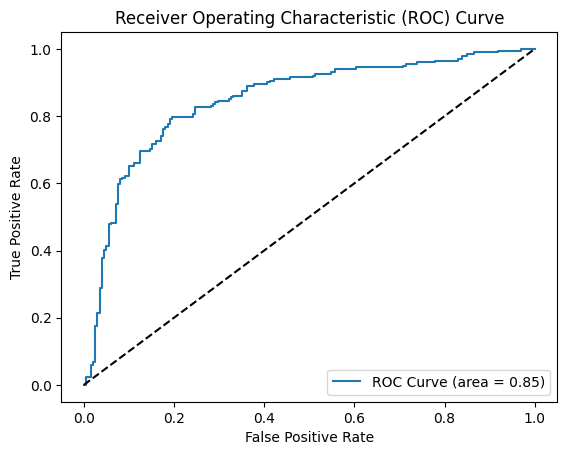

In [23]:
# LR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import pandas as pd

# 定义逻辑回归模型和参数网格
model = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# 使用GridSearchCV进行自动调参和5折交叉验证
grid_search_lr = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search_lr.fit(X_train, Y_train)

# 打印最佳参数和最佳得分
print('Best Parameters:', grid_search_lr.best_params_)
print('Best Score:', grid_search_lr.best_score_)

# 在训练集上评估模型
Y_train_pred = grid_search_lr.predict(X_train)
print('Training Accuracy:', accuracy_score(Y_train, Y_train_pred))
print('Training Precision:', precision_score(Y_train, Y_train_pred))
print('Training Recall:', recall_score(Y_train, Y_train_pred))
print('Training F1 Score:', f1_score(Y_train, Y_train_pred))

# 在测试集上评估模型
Y_test_pred = grid_search_lr.predict(X_test)
print('Testing Accuracy:', accuracy_score(Y_test, Y_test_pred))
print('Testing Precision:', precision_score(Y_test, Y_test_pred))
print('Testing Recall:', recall_score, Y_test_pred)
print('Testing F1 Score:', f1_score(Y_test, Y_test_pred))

# 绘制ROC曲线和计算AUC
fpr, tpr, thresholds = roc_curve(Y_test, grid_search_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

比较三个代表性模型的性能，如果相差很大，那就不用再加RF, SVM,如果相差不大，加上。
多个模型和多个可解释性的比较分析，用预测正确的结果进行可解释性分析。


In [24]:
# 将LR, XGB, NN的模型性能进行对比

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc

# 训练三个机器学习模型并预测测试集
model_lr = grid_search_lr
model_xgb = grid_search_xgb
model_mlp = grid_search_mlp

Y_test_pred1 = model_lr.predict(X_test)
Y_test_pred2 = model_xgb.predict(X_test)
Y_test_pred3 = model_mlp.predict(X_test)

# 计算评价指标
accuracy_train1 = accuracy_score(Y_train, model_lr.predict(X_train))
accuracy_train2 = accuracy_score(Y_train, model_xgb.predict(X_train))
accuracy_train3 = accuracy_score(Y_train, model_mlp.predict(X_train))

accuracy_test1 = accuracy_score(Y_test, model_lr.predict(X_test))
accuracy_test2 = accuracy_score(Y_test, model_xgb.predict(X_test))
accuracy_test3 = accuracy_score(Y_test, model_mlp.predict(X_test))

precision_train1 = precision_score(Y_train, model_lr.predict(X_train))
precision_train2 = precision_score(Y_train, model_xgb.predict(X_train))
precision_train3 = precision_score(Y_train, model_mlp.predict(X_train))

precision_test1 = precision_score(Y_test, Y_test_pred1)
precision_test2 = precision_score(Y_test, Y_test_pred2)
precision_test3 = precision_score(Y_test, Y_test_pred3)

recall_train1 = recall_score(Y_train, model_lr.predict(X_train))
recall_train2 = recall_score(Y_train, model_xgb.predict(X_train))
recall_train3 = recall_score(Y_train, model_mlp.predict(X_train))

recall_test1 = recall_score(Y_test, Y_test_pred1)
recall_test2 = recall_score(Y_test, Y_test_pred2)
recall_test3 = recall_score(Y_test, Y_test_pred3)

f1score_train1 = f1_score(Y_train, model_lr.predict(X_train))
f1score_train2 = f1_score(Y_train, model_xgb.predict(X_train))
f1score_train3 = f1_score(Y_train, model_mlp.predict(X_train))

f1score_test1 = f1_score(Y_test, Y_test_pred1)
f1score_test2 = f1_score(Y_test, Y_test_pred2)
f1score_test3 = f1_score(Y_test, Y_test_pred3)

# 将评价指标存储在字典中
results_train = {
    'Model': ['Model_lr', 'Model_xgb', 'Model_mlp'],
    'Accuracy (train)': [accuracy_train1, accuracy_train2, accuracy_train3],
    'Precision (train)': [precision_train1, precision_train2, precision_train3],
    'Recall (train)': [recall_train1, recall_train2, recall_train3],
    'F1 score (train)': [f1score_train1, f1score_train2, f1score_train3],
}
results_test = {
    'Model': ['Model_lr', 'Model_xgb', 'Model_mlp'],
    'Accuracy (test)': [accuracy_test1, accuracy_test2, accuracy_test3],
    'Precision (test)': [precision_test1, precision_test2, precision_test3],
    'Recall (test)': [recall_test1, recall_test2, recall_test3],
    'F1 score (test)': [f1score_test1, f1score_test2, f1score_test3],
}
# 将字典转换为 Pandas 数据框
df_results_train = pd.DataFrame(results_train)
df_results_test = pd.DataFrame(results_test)

# 打印结果
print(df_results_train)
print(df_results_test)

       Model  Accuracy (train)  Precision (train)  Recall (train)   
0   Model_lr          0.768750           0.783355        0.742178  \
1  Model_xgb          0.886875           0.905512        0.863579   
2  Model_mlp          0.838125           0.840909        0.833542   

   F1 score (train)  
0          0.762211  
1          0.884049  
2          0.837209  
       Model  Accuracy (test)  Precision (test)  Recall (test)   
0   Model_lr           0.7900          0.809524       0.761194  \
1  Model_xgb           0.7950          0.802030       0.786070   
2  Model_mlp           0.8125          0.808824       0.820896   

   F1 score (test)  
0         0.784615  
1         0.793970  
2         0.814815  


In [25]:
df_results_train

,Model,Accuracy (train),Precision (train),Recall (train),F1 score (train)
0,Model_lr,0.768750,0.783355,0.742178,0.762211
1,Model_xgb,0.886875,0.905512,0.863579,0.884049
2,Model_mlp,0.838125,0.840909,0.833542,0.837209


In [26]:
df_results_test

,Model,Accuracy (test),Precision (test),Recall (test),F1 score (test)
0,Model_lr,0.7900,0.809524,0.761194,0.784615
1,Model_xgb,0.7950,0.802030,0.786070,0.793970
2,Model_mlp,0.8125,0.808824,0.820896,0.814815


In [36]:
Y_test.shape

(400,)

xgb_loss 0.4444525618421629
linear_loss 0.5052769723591536
dnn_loss 6.758185010459465

xgb_roc_auc 0.8732843321083027
linear_roc_auc 0.8472211805295131
dnn_roc_auc 0.8124578114452862

xgb_pr_auc 0.8821174745506244
linear_pr_auc 0.814432883714969
dnn_pr_auc 0.7539596136962248



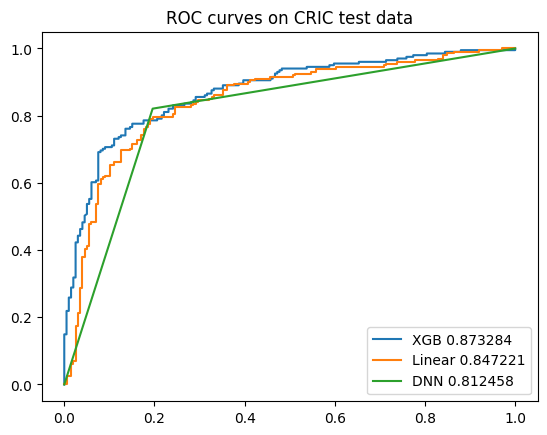

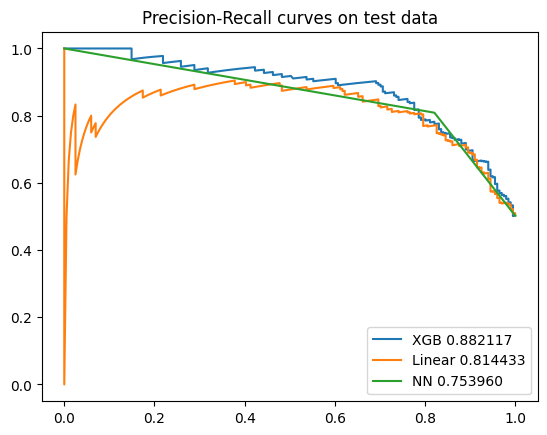

In [44]:
# Compute performance metrics
Y_test1 = Y_test.ravel() # 将Y_test1转换为一维数组
xgb_loss = sklearn.metrics.log_loss(Y_test1, model_xgb.predict_proba(X_test)[:,1])
linear_loss = sklearn.metrics.log_loss(Y_test1, model_lr.predict_proba(X_test)[:,1])
nn_loss = sklearn.metrics.log_loss(Y_test1, model_mlp.predict(X_test))
# constant_loss = sklearn.metrics.log_loss(Y_test1, np.zeros(len(Y_test1)) * y_strain.mean())
print("xgb_loss", xgb_loss)
print("linear_loss", linear_loss)
print("dnn_loss", nn_loss)
print()

xgb_roc_auc = sklearn.metrics.roc_auc_score(Y_test1, model_xgb.predict_proba(X_test)[:,1])
linear_roc_auc = sklearn.metrics.roc_auc_score(Y_test1, model_lr.predict_proba(X_test)[:,1])
dnn_roc_auc = sklearn.metrics.roc_auc_score(Y_test1, model_mlp.predict(X_test))
#svm_roc_auc = sklearn.metrics.roc_auc_score(Y_test1, svm_model.predict_proba(X_test))
print("xgb_roc_auc", xgb_roc_auc)
print("linear_roc_auc", linear_roc_auc)
print("dnn_roc_auc", dnn_roc_auc)
#print("svm_roc_auc", svm_roc_auc)
print()

xgb_pr_auc = sklearn.metrics.average_precision_score(Y_test1, model_xgb.predict_proba(X_test)[:,1])
linear_pr_auc = sklearn.metrics.average_precision_score(Y_test1, model_lr.predict_proba(X_test)[:,1])
dnn_pr_auc = sklearn.metrics.average_precision_score(Y_test1, model_mlp.predict(X_test))
#svm_pr_auc = sklearn.metrics.average_precision_score(Y_test1, svm_model.predict_proba(X_test))
print("xgb_pr_auc", xgb_pr_auc)
print("linear_pr_auc", linear_pr_auc)
print("dnn_pr_auc", dnn_pr_auc)
#print("svm_pr_auc", svm_pr_auc)
print()

xgb_fpr, xgb_tpr, thresholds = sklearn.metrics.roc_curve(Y_test1, model_xgb.predict_proba(X_test)[:,1])
linear_fpr, linear_tpr, thresholds = sklearn.metrics.roc_curve(Y_test1, model_lr.predict_proba(X_test)[:,1])
dnn_fpr, dnn_tpr, thresholds = sklearn.metrics.roc_curve(Y_test1, model_mlp.predict(X_test))
#svm_fpr, svm_tpr, thresholds = sklearn.metrics.roc_curve(Y_test1, svm_model.predict_proba(X_test))


pl.plot(xgb_fpr, xgb_tpr, label="XGB %f" % xgb_roc_auc)
pl.plot(linear_fpr, linear_tpr, label="Linear %f" % linear_roc_auc)
pl.plot(dnn_fpr, dnn_tpr, label="DNN %f" % dnn_roc_auc)
#pl.plot(svm_fpr, svm_tpr, label="SVM %f" % svm_roc_auc)
pl.legend()
pl.title("ROC curves on CRIC test data")
pl.show()

xgb_prec, xgb_recall, thresholds = sklearn.metrics.precision_recall_curve(Y_test1, model_xgb.predict_proba(X_test)[:,1])
linear_prec, linear_recall, thresholds = sklearn.metrics.precision_recall_curve(Y_test1, model_lr.predict_proba(X_test)[:,1])
dnn_prec, dnn_recall, thresholds = sklearn.metrics.precision_recall_curve(Y_test1, model_mlp.predict(X_test))
#svm_prec, svm_recall, thresholds = sklearn.metrics.precision_recall_curve(Y_test1, svm_model.predict_proba(X_test))

pl.plot(xgb_recall, xgb_prec, label="XGB %f" % xgb_pr_auc)
pl.plot(linear_recall, linear_prec, label="Linear %f" % linear_pr_auc)
pl.plot(dnn_recall, dnn_prec, label="NN %f" % dnn_pr_auc)
#pl.plot(svm_recall, svm_prec, label="SVM %f" % svm_pr_auc)
pl.legend()
pl.title("Precision-Recall curves on test data")
pl.show()

### 将三个模型预测准确的样本选出来分别放入一个样本集中，用于后续可解释性方法对比分析
1. 用训练好的模型预测剩余样本
2. 将所有样本（训练集、测试集、预测集）预测概率与是否预测正确输出，并于样本编号匹配
3. 挑选出预测正确的样本
4. 用不同可解释性方法对不同模型预测正确的样本进行可解释性分析

In [29]:
X_train_orgin

,FID_,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
16222,16779,1.049907,0.168794,0.557996,1129.889503,3.662467,2255.010078,5.742475
8521,8760,1.030456,0.166262,0.554642,884.389714,3.271473,1518.635023,5.522590
15352,15866,1.010183,0.170970,0.588249,883.283815,3.428352,1311.209166,6.065288
4342,4469,1.039167,0.162994,0.540616,423.032404,3.093332,415.010002,4.705822
15324,15837,1.023857,0.170286,0.594285,164.874177,1.070095,622.495900,7.137646
...,...,...,...,...,...,...,...,...
10131,10403,1.030044,0.170952,0.563003,333.033251,2.290530,574.086358,7.931736
15593,16132,1.032253,0.170500,0.596371,154.315681,1.327678,568.651734,4.734017
760,773,1.059307,0.174226,0.536926,1390.640338,4.359947,2394.214195,4.811757
9744,10003,1.033008,0.165231,0.554992,449.098707,2.469748,568.980120,5.601915


In [30]:
X_train

,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
16222,0.809721,0.173597,-0.049484,1.364486,1.073710,1.434431,-0.187149
8521,0.438820,-0.200942,-0.233291,0.758543,0.671680,0.528996,-0.351752
15352,0.052245,0.495509,1.608568,0.755813,0.832987,0.273948,0.054505
4342,0.604914,-0.684353,-1.002045,-0.380179,0.488511,-0.828004,-0.963176
15324,0.312975,0.394279,1.939391,-1.017365,-1.591836,-0.572883,0.857261
...,...,...,...,...,...,...,...
10131,0.430966,0.492780,0.224916,-0.602315,-0.336952,-0.632407,1.451708
15593,0.473075,0.425938,2.053702,-1.043426,-1.326983,-0.639089,-0.942070
760,0.988960,0.977077,-1.204249,2.008071,1.790879,1.605595,-0.883874
9744,0.487478,-0.353484,-0.214127,-0.315842,-0.152675,-0.638685,-0.292371


In [31]:
df2

,FID_,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW,label
0,0,1.032337,0.173904,0.540760,1399.816133,3.449655,2032.268709,7.511351,1
2,2,1.034249,0.173900,0.540413,1427.899396,3.355286,2170.271564,7.548316,1
3,3,1.040040,0.173918,0.539438,1487.814834,3.489952,2261.629379,8.816202,1
4,4,1.038104,0.173915,0.539721,1472.312893,3.421316,2262.551560,9.006661,1
5,5,1.031257,0.173902,0.540960,1400.698530,3.587869,1970.089000,5.458872,1
...,...,...,...,...,...,...,...,...,...
16862,17496,0.935459,0.191556,0.553047,342.628301,3.359726,1080.673409,5.261832,0
16863,17497,0.973075,0.173802,0.558195,288.711012,2.471787,995.830005,5.545090,0
16864,17498,0.972212,0.173765,0.558101,301.895848,2.573513,1024.210310,7.424834,0
16865,17499,0.974931,0.173857,0.558490,242.731595,2.150453,890.199884,6.642009,0


In [33]:
X_pred

,average_max_rainfall,average_2hr_rainfall,average_72hr_rainfall,distance to coast,EV,TWI,DTW
0,0.474679,0.929422,-0.994147,2.030718,0.854892,1.160552,1.137013
2,0.511135,0.928919,-1.013142,2.100033,0.757858,1.330238,1.164684
3,0.621560,0.931501,-1.066588,2.247917,0.896326,1.442570,2.113809
4,0.584658,0.931108,-1.051102,2.209655,0.825753,1.443704,2.256385
5,0.454081,0.929120,-0.983161,2.032896,0.997007,1.084097,-0.399450
...,...,...,...,...,...,...,...
16862,-1.372627,3.540585,-0.320730,-0.578632,0.762424,-0.009515,-0.546952
16863,-0.655339,0.914435,-0.038612,-0.711711,-0.150579,-0.113837,-0.334909
16864,-0.671812,0.908980,-0.043743,-0.679168,-0.045981,-0.078941,1.072247
16865,-0.619966,0.922521,-0.022415,-0.825197,-0.480983,-0.243718,0.486232


In [28]:
# 将训练、测试、预测结果与输入一起保存到output文件中
# 训练集
output_train_lr = pd.concat([X_train_orgin, Y_train_orgin, pd.Series(model_lr.predict_proba(X_train)[:,1], index=X_train_orgin.index,name='probability_1')], axis=1) # 保留预测为1的概率
outpt_train_xgb = pd.concat([X_train_orgin, Y_train_orgin, pd.Series(model_xgb.predict_proba(X_train)[:,1], index=X_train_orgin.index,name='probability_1')], axis=1) # 保留预测为1的概率
output_train_mlp = pd.concat([X_train_orgin, Y_train_orgin, pd.Series(model_mlp.predict_proba(X_train)[:,1], index=X_train_orgin.index, name='probability_1')], axis=1) # 保留预测为1的概率

# 测试集
output_test_lr = pd.concat([X_test_orgin, Y_test_orgin, pd.Series(model_lr.predict_proba(X_test)[:,1], index=X_test_orgin.index,name='probability_1')], axis=1) # 保留预测为1的概率
output_test_xgb = pd.concat([X_test_orgin, Y_test_orgin, pd.Series(model_xgb.predict_proba(X_test)[:,1], index=X_test_orgin.index,name='probability_1')], axis=1) # 保留预测为1的概率
output_test_mlp = pd.concat([X_test_orgin, Y_test_orgin, pd.Series(model_mlp.predict_proba(X_test)[:,1], index=X_test_orgin.index, name='probability_1')], axis=1) # 保留预测为1的概率

# 预测集
output_pred_lr = pd.concat([df2, pd.Series(model_lr.predict_proba(X_pred)[:,1], index=df2.index,name='probability_1')], axis=1) # 保留预测为1的概率
output_pred_xgb = pd.concat([df2, pd.Series(model_xgb.predict_proba(X_pred)[:,1], index=df2.index,name='probability_1')], axis=1) # 保留预测为1的概率
output_pred_mlp = pd.concat([df2, pd.Series(model_mlp.predict_proba(X_pred)[:,1], index=df2.index, name='probability_1')], axis=1) # 保留预测为1的概率


# predicted列为预测结果，0为未被淹，1为被淹
# 训练集
output_train_lr['predicted'] = (output_train_lr['probability_1'] >= 0.5).astype(int)
outpt_train_xgb['predicted'] = (outpt_train_xgb['probability_1'] >= 0.5).astype(int)
output_train_mlp['predicted'] = (output_train_mlp['probability_1'] >= 0.5).astype(int)

# 测试集
output_test_lr['predicted'] = (output_test_lr['probability_1'] >= 0.5).astype(int)
output_test_xgb['predicted'] = (output_test_xgb['probability_1'] >= 0.5).astype(int)
output_test_mlp['predicted'] = (output_test_mlp['probability_1'] >= 0.5).astype(int)

# 预测集
output_pred_lr['predicted'] = (output_pred_lr['probability_1'] >= 0.5).astype(int)
output_pred_xgb['predicted'] = (output_pred_xgb['probability_1'] >= 0.5).astype(int)
output_pred_mlp['predicted'] = (output_pred_mlp['probability_1'] >= 0.5).astype(int)


# 判断预测是否正确
# 训练集
output_train_lr['correct'] = (output_train_lr['predicted'] == output_train_lr['label']).astype(int)
outpt_train_xgb['correct'] = (outpt_train_xgb['predicted'] == outpt_train_xgb['label']).astype(int)
output_train_mlp['correct'] = (output_train_mlp['predicted'] == output_train_mlp['label']).astype(int)

# 测试集
output_test_lr['correct'] = (output_test_lr['predicted'] == output_test_lr['label']).astype(int)
output_test_xgb['correct'] = (output_test_xgb['predicted'] == output_test_xgb['label']).astype(int)
output_test_mlp['correct'] = (output_test_mlp['predicted'] == output_test_mlp['label']).astype(int)

# 预测集
output_pred_lr['correct'] = (output_pred_lr['predicted'] == output_pred_lr['label']).astype(int)
output_pred_xgb['correct'] = (output_pred_xgb['predicted'] == output_pred_xgb['label']).astype(int)
output_pred_mlp['correct'] = (output_pred_mlp['predicted'] == output_pred_mlp['label']).astype(int)

# 将预测正确的样本保存在output文件中
# 训练集
output_train_lr_correct = output_train_lr[output_train_lr['correct'] == 1]
outpt_train_xgb_correct = outpt_train_xgb[outpt_train_xgb['correct'] == 1]
output_train_mlp_correct = output_train_mlp[output_train_mlp['correct'] == 1]

# 测试集
output_test_lr_correct = output_test_lr[output_test_lr['correct'] == 1]
output_test_xgb_correct = output_test_xgb[output_test_xgb['correct'] == 1]
output_test_mlp_correct = output_test_mlp[output_test_mlp['correct'] == 1]

# 预测集
output_pred_lr_correct = output_pred_lr[output_pred_lr['correct'] == 1]
output_pred_xgb_correct = output_pred_xgb[output_pred_xgb['correct'] == 1]
output_pred_mlp_correct = output_pred_mlp[output_pred_mlp['correct'] == 1]

# 保存到CSV文件中
# 测试集
output_train_lr_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_train_lr_correct.csv', index=False)
outpt_train_xgb_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_train_xgb_correct.csv', index=False)
output_train_mlp_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_train_mlp_correct.csv', index=False)

# 测试集
output_test_lr_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_test_lr_correct.csv', index=False)
output_test_xgb_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_test_xgb_correct.csv', index=False)
output_test_mlp_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_test_mlp_correct.csv', index=False)

# 预测集
output_pred_lr_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_pred_lr_correct.csv', index=False)
output_pred_xgb_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_pred_xgb_correct.csv', index=False)
output_pred_mlp_correct.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/output_pred_mlp_correct.csv', index=False)

# 将测试集、训练集、预测集结果预测正确的样本保存在一个文件中
output_pred_lr_correct_all = pd.concat([output_train_lr_correct, output_test_lr_correct, output_pred_lr_correct], axis=0)
output_pred_xgb_correct_all = pd.concat([outpt_train_xgb_correct, output_test_xgb_correct, output_pred_xgb_correct], axis=0)
output_pred_mlp_correct_all = pd.concat([output_train_mlp_correct, output_test_mlp_correct, output_pred_mlp_correct], axis=0)

# 保存到CSV文件中
output_pred_lr_correct_all.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/all_output_pred_lr_correct.csv', index=False)
output_pred_xgb_correct_all.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/all_output_pred_xgb_correct.csv', index=False)
output_pred_mlp_correct_all.to_csv('/workspaces/Interpretable_ML_UFSM/Interpretable_ML_for_UFSM/output/all_output_pred_mlp_correct.csv', index=False)




In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 计算 ROC AUC 分数
roc_auc_01 = roc_auc_score(Y_test, model1.predict_proba(X_test)[:, 0])
roc_auc_02 = roc_auc_score(Y_test, model2.predict_proba(X_test)[:, 0])
roc_auc_03 = roc_auc_score(Y_test, model3.predict_proba(X_test)[:, 0])

# 将结果存储在字典中
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy (test)': [accuracy_test1, accuracy_test2, accuracy_test3],
    'Precision (train)': [precision_train1, precision_train2, precision_train3],
    'Recall (train)': [recall_train1, recall_train2, recall_train3],
    'F1 score (train)': [f1score_train1, f1score_train2, f1score_train3],
    'ROC AUC score (test)': [roc_auc_01, roc_auc_02, roc_auc_03]
}

# 将字典转换为 Pandas 数据框
df_results = pd.DataFrame(results)

# 打印结果
print(df_results)

NameError: name 'accuracy_test1' is not defined

In [57]:
# SVM

# 标准化对精度影响不大

# svc_linear = sklearn.svm.SVC(kernel='linear', probability=True, )


# 定义5折交叉验证器
# 五折交叉验证
X = X_train[['average_max_rainfall', 'average_2hr_rainfall', 'average_72hr_rainfall', 'distance to coast', 'EV', 'TWI', 'DTW']]
y = Y_train

# 定义逻辑回归模型
# 网格搜索参数
svr = sklearn.svm.SVC(probability=True)
parameters_svm = {'kernel':('linear','rbf'), 'C':[0.1,0.5,1,10,100],'gamma':[0.001,0.01,0.1,0.5,1,10]} 
# 'C':[1,2,3,4,5,6,7,8,9,10,15,20,50,100] 'gamma':[0.125,0.25,0.5,1,2,4,6,10,15,20,25,30,40,50,70,100]
clf = GridSearchCV(svr, parameters_svm, scoring='f1')


# 定义五折交叉验证器
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 进行五折交叉验证
# train_losses = []
# test_losses = []
for train_index, test_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_val = y.iloc[train_index], y.iloc[test_index]
    
    # 训练模型
    clf.fit(X_train, Y_train)
    # train_loss = clf.score(X_train, Y_train)
    # test_loss = clf.score(X_test, Y_test)
    # train_losses.append(train_loss)
    # test_losses.append(test_loss)
    # 在测试集上评估模型性能
    score = clf.score(X_val, Y_val)
    
    print('Accuracy:', score)

'''
# 绘制loss曲线图
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''
#svc_linear = sklearn.svm.SVC(kernel='rbf', C=10, gamma=0.25, probability=True, )




# svc_linear.fit(X_train, Y_train)

pred_test_y = clf.predict(X_test)

print_train_accuracy(clf.predict)

print_test_accuracy(clf.predict)

# 预测准确为1 错误为0

svm = pd.DataFrame(list(zip(pred_test_y, Y_test)),columns=['predicted', 'actual'])
svm['correct'] = svm.apply(lambda x:1 if x["predicted"]==x['actual']else 0, axis=1)
print('The best parameter are %s with a score of %0.2f' % (clf.best_params_, clf.best_score_))


'''
# explain all the predictions in the test set
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''

'''
Accuracy = 85.875%
Accuracy = 78.75%
The best parameter are {'C': 10, 'gamma': 0.25, 'kernel': 'rbf'} with a score of 0.78

最好成绩 但有点过拟合
Accuracy: 0.7615384615384616
Accuracy: 0.7522123893805309
Accuracy: 0.7398373983739839
Accuracy: 0.7918367346938776
Accuracy: 0.7355371900826447
Accuracy = 83.88671875%
Accuracy = 80.5%
The best parameter are {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'} with a score of 0.77

Accuracy: 0.7517730496453902
Accuracy: 0.7794117647058824
Accuracy: 0.7047619047619049
Accuracy: 0.7394957983193278
Accuracy: 0.7627118644067797
Accuracy = 77.14285714285714%
Accuracy = 78.0%
The best parameter are {'C': 1, 'gamma': 0.1, 'kernel': 'linear'} with a score of 0.76

Accuracy: 0.7588424437299036
Accuracy: 0.7927927927927928
Accuracy: 0.7656765676567656
Accuracy: 0.8102893890675241
Accuracy: 0.7555555555555556
Accuracy = 83.4375%
Accuracy = 78.25%
The best parameter are {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'} with a score of 0.79

Accuracy: 0.7419354838709677
Accuracy: 0.7662337662337663
Accuracy: 0.7483443708609273
Accuracy: 0.7469135802469135
Accuracy: 0.8012232415902141
Accuracy = 81.875%
Accuracy = 83.5%
# 测试集精度高于训练集？？？
The best parameter are {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'} with a score of 0.76

Accuracy: 0.7985074626865671
Accuracy: 0.7058823529411765
Accuracy: 0.8131868131868133
Accuracy: 0.7749077490774907
Accuracy: 0.8015873015873015
Accuracy = 83.59375%
Accuracy = 75.25%
The best parameter are {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'} with a score of 0.78
'''

KeyboardInterrupt: 

In [ ]:
pred_test_y = clf.predict_proba(X_test)
pred_test_y
# 为什么是两列 0和1的概率 0的概率大于0.5就是0 1的概率大于0.5就是1 但是这个概率是怎么计算的呢 

array([[0.23090669, 0.76909331],
       [0.78693727, 0.21306273],
       [0.32268015, 0.67731985],
       [0.37246923, 0.62753077],
       [0.95936903, 0.04063097],
       [0.87815705, 0.12184295],
       [0.17590951, 0.82409049],
       [0.09315213, 0.90684787],
       [0.92310032, 0.07689968],
       [0.3125743 , 0.6874257 ],
       [0.47734739, 0.52265261],
       [0.17438511, 0.82561489],
       [0.33544726, 0.66455274],
       [0.22088481, 0.77911519],
       [0.35634866, 0.64365134],
       [0.91759022, 0.08240978],
       [0.84719231, 0.15280769],
       [0.65070463, 0.34929537],
       [0.27493253, 0.72506747],
       [0.91985989, 0.08014011],
       [0.51851482, 0.48148518],
       [0.13652374, 0.86347626],
       [0.06692718, 0.93307282],
       [0.80835233, 0.19164767],
       [0.78672743, 0.21327257],
       [0.31945559, 0.68054441],
       [0.93264453, 0.06735547],
       [0.78115417, 0.21884583],
       [0.35407484, 0.64592516],
       [0.0526547 , 0.9473453 ],
       [0.

In [ ]:
svm

,predicted,actual,correct
0,1,1,1
1,0,1,0
2,1,1,1
3,1,1,1
4,0,0,1
...,...,...,...
395,0,0,1
396,0,0,1
397,0,0,1
398,0,0,1


In [ ]:
# y_true：测试集的真实标签
# y_pred：测试集的预测标签

# SVM模型性能评估
# 准确率
y_true = Y_test
y_pred_svm = clf.predict(X_test)
accuracy_svm = accuracy_score(y_true, y_pred_svm)

# 精确度
precision_svm = precision_score(y_true, y_pred_svm)

# 召回率
recall_svm = recall_score(y_true, y_pred_svm)

# F1分数
f1_svm = f1_score(y_true, y_pred_svm)

# ROC-AUC分数
roc_auc_svm = roc_auc_score(y_true, y_pred_svm)

print(accuracy_svm, precision_svm, recall_svm, f1_svm, roc_auc_svm)

0.775 0.7894736842105263 0.75 0.7692307692307692 0.7750000000000001


In [ ]:
# Logistic regression
linear_lr = sklearn.linear_model.LogisticRegression()
linear_lr.fit(X_train, Y_train)
print_train_accuracy(linear_lr.predict)
print_test_accuracy(linear_lr.predict)

# 标准化对精度影响不大

'''
# explain all the predictions in the test set
explainer = shap.KernelExplainer(linear_lr.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''

Accuracy = 78.4375%
Accuracy = 77.5%


'\n# explain all the predictions in the test set\nexplainer = shap.KernelExplainer(linear_lr.predict_proba, X_train)\nshap_values = explainer.shap_values(X_test)\nshap.force_plot(explainer.expected_value[0], shap_values[0], X_test)\n'

In [ ]:
# LR模型性能评估
# 准确率
y_true = Y_test
y_pred_lr = linear_lr.predict(X_test)
accuracy_lr = accuracy_score(y_true, y_pred_lr)

# 精确度
precision_lr = precision_score(y_true, y_pred_lr)

# 召回率
recall_lr = recall_score(y_true, y_pred_lr)

# F1分数
f1_lr = f1_score(y_true, y_pred_lr)

# ROC-AUC分数
roc_auc_lr = roc_auc_score(y_true, y_pred_lr)

print(accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr)

0.775 0.7894736842105263 0.75 0.7692307692307692 0.7750000000000001


In [ ]:
# DT
import sklearn.tree 
dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)
dtree.fit(X_train, Y_train)
print_train_accuracy(dtree.predict)
print_test_accuracy(dtree.predict)


# 标准化对DT影响很大，训练集精度直接从70%上升到100%

'''
# explain all the predictions in the test set
explainer = shap.KernelExplainer(dtree.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''

Accuracy = 100.0%
Accuracy = 77.0%


'\n# explain all the predictions in the test set\nexplainer = shap.KernelExplainer(dtree.predict_proba, X_train)\nshap_values = explainer.shap_values(X_test)\nshap.force_plot(explainer.expected_value[0], shap_values[0], X_test)\n'

In [ ]:
# DT模型性能评估
# 准确率
y_true = Y_test
y_pred_dt = dtree.predict(X_test)
accuracy_dt = accuracy_score(y_true, y_pred_dt)

# 精确度
precision_dt = precision_score(y_true, y_pred_dt)

# 召回率
recall_dt = recall_score(y_true, y_pred_dt)

# F1分数
f1_dt = f1_score(y_true, y_pred_dt)

# ROC-AUC分数
roc_auc_dt = roc_auc_score(y_true, y_pred_dt)

print(accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt)

0.77 0.7389380530973452 0.835 0.7840375586854459 0.77


In [ ]:
# RF_未调参
# 用交叉验证计算得分
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, X_train,Y_train,cv=10).mean() # data.data是特征，data.target是标签
score_pre

0.7929183323814962

最大得分：0.7929373691224062 子树数量为：131


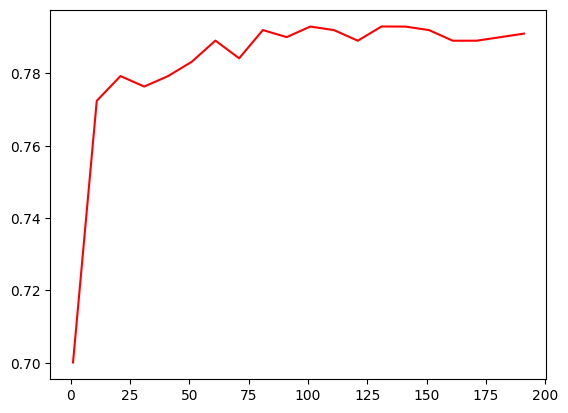

'\n# explain all the predictions in the test set\nexplainer = shap.KernelExplainer(rforest.predict_proba, X_train)\nshap_values = explainer.shap_values(X_test)\nshap.force_plot(explainer.expected_value[0], shap_values[0], X_test)\n'

In [ ]:
# RF

# 标准化对随机森林模型的影响也不大

# 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
score_lt = []

# 每隔10步建立一个随机森林，获得不同n_estimators的得分
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_train, Y_train, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()



'''
# explain all the predictions in the test set
explainer = shap.KernelExplainer(rforest.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''

In [ ]:
# 建立n_estimators为151的随机森林
rfc = RandomForestClassifier(n_estimators=131, random_state=90)

# 用网格搜索调整max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X_train, Y_train)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 13} 0.7948695983247667


In [ ]:
rforest= RandomForestClassifier(n_estimators=131, max_depth=13, random_state=90)

rforest.fit(X_train, Y_train)
print_train_accuracy(rforest.predict)
print_test_accuracy(rforest.predict)

# 过拟合

Accuracy = 99.31640625%
Accuracy = 77.25%


In [ ]:
# RF模型性能评估
# 准确率
y_true = Y_test
y_pred_rf = rforest.predict(X_test)
accuracy_rf = accuracy_score(y_true, y_pred_rf)

# 精确度
precision_rf = precision_score(y_true, y_pred_rf)

# 召回率
recall_rf = recall_score(y_true, y_pred_rf)

# F1分数
f1_rf = f1_score(y_true, y_pred_rf)

# ROC-AUC分数
roc_auc_rf = roc_auc_score(y_true, y_pred_rf)

print(accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf)

0.7575 0.7696335078534031 0.735 0.751918158567775 0.7575


In [ ]:
# XGBoost SHAP
# create train/validation split
Xt, Xv, yt, yv = train_test_split(X_train,Y_train, test_size=0.2, random_state=10)
dt = xgb.DMatrix(Xt, label=yt.values)
dv = xgb.DMatrix(Xv, label=yv.values)

params = {
    "eta": 0.5,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(yt),
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 300, [(dt, "train"),(dv, "valid")], early_stopping_rounds=5, verbose_eval=25) 


[16:26:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-logloss:0.54851	valid-logloss:0.55377
[12]	train-logloss:0.29363	valid-logloss:0.45708


Pass `evals` as keyword args.


In [ ]:
# XGB_CHATGPT

# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBoost classifier object
clf = xgb.XGBClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid=params)
grid_search.fit(X_train, Y_train)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, Y_train)

# Evaluate the model on the testing set
Y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

KeyboardInterrupt: 

In [ ]:
# XGBoost

# 标准化输入特征对XGBoost影响不明显，标准化前后训练集和测试集精度变化不大


# 定义XGBoost分类器模型
xgb_model = xgb.XGBClassifier()

# 定义要调整的参数范围
param_grid = {
    'max_depth': [3,5,8,12,15,17,25],
    'learning_rate': [0.01, 0.015,0.05, 0.1],
    'n_estimators': [50, 100],
    'gamma': [0,0.2, 0.5,0.7,0.9,1],
    'lambda':[0,0.1,0.5,1],
    # 'min_child_weight':[0,0.5,1,5,10],
    # 'subsample':[0.6,0.7,0.9,1],
    # 'colsample_bytree':[0.6,0.7,0.9,1],
    #'objective': ['binary:logistic']
    
}

# 使用GridSearchCV自动调参
grid_search = GridSearchCV(xgb_model, param_grid=param_grid)
grid_search.fit(X_train, Y_train)

# 输出最佳参数组合和得分
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 使用最佳参数组合重新训练模型并进行预测
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train, Y_train)
Y_pred = best_xgb_model.predict(X_test)
Y_pred_train = best_xgb_model.predict(X_train)

# 计算模型精度
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

print("Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy: %.2f%%" % (accuracy_test * 100.0))

# 用寻优得到的参数重新训练模型

model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000) # 10000次迭代, 每1000次输出一次结果, evals = [(xgb_test, "test")] 每次迭代都会在test上输出结果, verbose_eval=1000 每1000次输出一次结果, 有利于观察训练过程

'''
# explain all the predictions in the test set
explainer = shap.KernelExplainer(xgb_model2.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''


'''
xgb_model = xgboost.XGBClassifier(objective='binary:logistic')
xgb_model.fit(X_train,Y_train)
print_train_accuracy(xgb_model.predict)
print_test_accuracy(xgb_model.predict)


# explain all the predictions in the test set
explainer = shap.KernelExplainer(xgb_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''


KeyboardInterrupt: 

In [ ]:
# xgboost模型性能评估
# 准确率
y_true = Y_test
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_true, y_pred_xgb)

# 精确度
precision_xgb = precision_score(y_true, y_pred_xgb)

# 召回率
recall_xgb = recall_score(y_true, y_pred_xgb)

# F1分数
f1_xgb = f1_score(y_true, y_pred_xgb)

# ROC-AUC分数
roc_auc_xgb = roc_auc_score(y_true, y_pred_xgb)

print(accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb)

0.7975 0.8181818181818182 0.765 0.7906976744186047 0.7975


In [ ]:
# 定义XGBoost分类器模型
xgb_model = xgb.XGBClassifier()

# 定义要调整的参数范围
param_grid = {
    'max_depth': [3, 4, 5,6,7,8,9,12,15,17,25],
    'learning_rate': [0.01, 0.015, 0.025,0.05, 0.1],
    'n_estimators': [50, 100],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1],
    'lambda':[0,0.1,0.5,1],
    'min_child_weight':[0,0.5,1,2,3,4,5,6,7,8,9,10],
    'subsample':[0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1],
    'objective': ['binary:logistic']
    
}

# 使用GridSearchCV自动调参
grid_search = GridSearchCV(xgb_model, param_grid=param_grid)
grid_search.fit(X_train, Y_train)

# 输出最佳参数组合和得分
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 使用最佳参数组合重新训练模型并进行预测
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train, Y_train)
Y_pred = best_xgb_model.predict(X_test)

# 计算模型精度
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 用寻优得到的参数重新训练模型


'''
# explain all the predictions in the test set
explainer = shap.KernelExplainer(xgb_model2.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''

KeyboardInterrupt: 

In [ ]:
# xgboost模型性能评估
# 准确率
y_true = Y_test
y_pred_xgb2 = xgb_model2.predict(X_test)
accuracy_xgb2 = accuracy_score(y_true, y_pred_xgb2)

# 精确度
precision_xgb2 = precision_score(y_true, y_pred_xgb2)

# 召回率
recall_xgb2 = recall_score(y_true, y_pred_xgb2)

# F1分数
f1_xgb2 = f1_score(y_true, y_pred_xgb2)

# ROC-AUC分数
roc_auc_xgb2 = roc_auc_score(y_true, y_pred_xgb2)

print(accuracy_xgb2, precision_xgb2, recall_xgb2, f1_xgb2, roc_auc_xgb2)

0.7933333333333333 0.8211678832116789 0.75 0.7839721254355401 0.7933333333333333


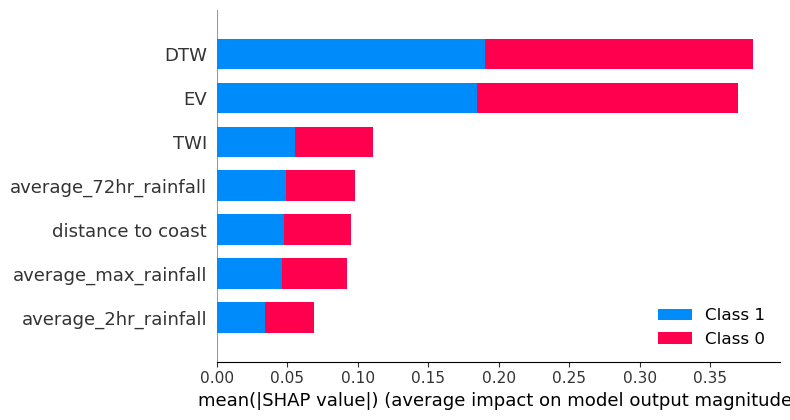

In [ ]:
shap.summary_plot(shap_values, X)
# shap.dependence_plot("Age", shap_values, X)
#shap.dependence_plot("Sex", shap_values, X, display_features=X_display)
# shap.dependence_plot("Systolic BP", shap_values, X, show=False)
# pl.xlim(80,225)
# pl.show()
# shap.dependence_plot("Poverty index", shap_values, X)

# shap.dependence_plot("White blood cells", shap_values, X, display_features=X_display, show=False)
# pl.xlim(2,15)
# pl.show()

In [ ]:
# Neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, Y_train)
print_train_accuracy(nn.predict)
print_test_accuracy(nn.predict)

# 标准化输入特征后，NN精度提升明显从50%提升到79%


'''
# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
'''

Accuracy = 79.4921875%
Accuracy = 76.25%


'\n# explain all the predictions in the test set\nexplainer = shap.KernelExplainer(nn.predict_proba, X_train)\nshap_values = explainer.shap_values(X_test)\nshap.force_plot(explainer.expected_value[0], shap_values[0], X_test)\n'

In [ ]:
'''
# NN_gpt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 定义神经网络模型
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(Y.shape[1], activation='softmax'))

# 编译模型并指定损失函数和优化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型并评估性能
model.fit(X_train, Y_train, epochs=30, batch_size=10) # 300个测试数据
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
'''

"\n# NN_gpt\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom sklearn.model_selection import train_test_split\nimport pandas as pd\n\n# 定义神经网络模型\nmodel = Sequential()\nmodel.add(Dense(64, input_dim=X.shape[1], activation='relu'))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dense(Y.shape[1], activation='softmax'))\n\n# 编译模型并指定损失函数和优化器\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n\n# 训练模型并评估性能\nmodel.fit(X_train, Y_train, epochs=30, batch_size=10) # 300个测试数据\nscore = model.evaluate(X_test, Y_test)\nprint('Test loss:', score[0])\nprint('Test accuracy:', score[1])\n"

In [ ]:
'''
# MLP_MULI
# 与线性回归不同, MLP输出的是概率
import torch
from torch import nn
net = nn.Sequential(nn.Linear())
'''

'\n# MLP_MULI\n# 与线性回归不同，MLP输出的是概率\nimport torch\nfrom torch import nn\nnet = nn.Sequential(nn.Linear())\n'

In [ ]:
# mlp模型性能评估
# 准确率
y_true = Y_test
y_pred_mlp = nn.predict(X_test)
accuracy_nn = accuracy_score(y_true, y_pred_mlp)

# 精确度
precision_nn = precision_score(y_true, y_pred_mlp)

# 召回率
recall_nn = recall_score(y_true, y_pred_mlp)

# F1分数
f1_nn = f1_score(y_true, y_pred_mlp)

# ROC-AUC分数
roc_auc_nn = roc_auc_score(y_true, y_pred_mlp)

print(accuracy_nn, precision_nn, recall_nn, f1_nn, roc_auc_nn)

0.505 0.5069767441860465 0.36333333333333334 0.42330097087378643 0.505


In [ ]:
# 展示不同模型训练精度指标结果
print('svm' ) 
print_train_accuracy(svc_linear.predict)
print(accuracy_svm.round(3), precision_svm.round(3), recall_svm.round(3), f1_svm.round(3), roc_auc_svm.round(3)) 
print('lr' ) 
print_train_accuracy(linear_lr.predict)
print(accuracy_lr.round(3), precision_lr.round(3), recall_lr.round(3), f1_lr.round(3), roc_auc_lr.round(3))
print('dt' ) 
print_train_accuracy(dtree.predict)
print(accuracy_dt.round(3), precision_dt.round(3), recall_dt.round(3), f1_dt.round(3), roc_auc_dt.round(3))
print('rf' ) 
print_train_accuracy(rforest.predict)
print(accuracy_rf.round(3), precision_rf.round(3), recall_rf.round(3), f1_rf.round(3), roc_auc_rf.round(3))
print('xgb' ) 
print_train_accuracy(xgb_model.predict)
print(accuracy_xgb.round(3), precision_xgb.round(3), recall_xgb.round(3), f1_xgb.round(3), roc_auc_xgb.round(3))
print('xgb2' ) 
print_train_accuracy(xgb_model2.predict)
print(accuracy_xgb2.round(3), precision_xgb2.round(3), recall_xgb2.round(3), f1_xgb2.round(3), roc_auc_xgb2.round(3))
print('nn' ) 
print_train_accuracy(nn.predict)
print(accuracy_nn.round(3), precision_nn.round(3), recall_nn.round(3), f1_nn.round(3), roc_auc_nn.round(3))

svm
0.768 0.797 0.72 0.757 0.768
lr
0.757 0.796 0.69 0.739 0.757
dt
0.727 0.724 0.733 0.728 0.727
rf
0.802 0.82 0.773 0.796 0.802
xgb
0.775 0.807 0.723 0.763 0.775
xgb2
0.793 0.821 0.75 0.784 0.793
nn
0.505 0.507 0.363 0.423 0.505


In [ ]:
# 要一个测试集和训练集的训练过程展示图_muli


In [ ]:
# 用性能最好的模型预测所有单元
# 绘制整个区域的易涝性，arcgis自然分割成多类


In [ ]:
# 建立一个GitHub仓库保存代码
# 应该是用vscode连接GitHub仓库进行代码的上传和更新
